# _Stjórn_ Stylometry

| Work         | Date             | Material      | Incipit                                                                         |
| ------------ | ---------------- | ------------- | ------------------------------------------------------------------------------- |
| _Stjórn I_   | s. xiv in.       | Gn--Ex 18.27  | i upphafi skapadi gud himin þat er sealft himinriki                             |
| _Stjórn II_  | s. xiii in.      | Ex 19--Dt     | a þridia manadi eptir brottfaur gydinga af egiptalandi komu þeir i audn synay   |
| _Stjórn III_ | s. xiii med.     | Ios           | moyses agietr guds uin aðr hann andadizt hafðe at guds raaðe                    |
| _Stjórn IV_  | ?                | Ios           | eptir andlat moyses ok harmsong þann er gydingar sungu eptir hann               |
| _Stjórn III_ | as above         | Idc--Rg       | efter andlat iosue læitaði israels lyðr raðs uið guð sua segiandi               |

Unger's edition follows AM 226 (written 1360x1370); Astås primarily follows AM 227 (written ca. 1350). _Stjórn IV_ refers to a shorter redaction of the material from the Book of Joshua, drawn from Peter Comestor's _Historica Scholastica_ and contained in AM 226 (and copied thence into AM 225). Unger prints both III and IV.

In [1]:
import glob,json,copy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import numpy as np
import pandas as pd
from bisect import bisect_left
from lexicalrichness import LexicalRichness
%matplotlib inline

In [2]:
chunk_size = 2000

In [3]:
with open('token_indices.json') as index_file:
    token_indices = json.load(index_file)

titles = ['prologue', 'introduction', 'gn', 'ex', 'lv', 'nm', 'dt', 'ios', 'idc', 'rt', '1sm', '2sm', '3rg', '4rg']
work_indices = {
    'stjorn1': 650,
    'stjorn2': 124417,
    'stjorn3a': 147678,
    'stjorn4': 156943,
    'stjorn3b': 160719
}

tokens = []
for title in titles:
    with open(f"nlp/{title}.txt") as raw:
        document = raw.read().replace('\n', ' ')
        tokens.extend(document.split())

In [4]:
text = dict()
section_list = list(token_indices.keys())
for index,section in enumerate(section_list):
    if section == section_list[-1]:
            continue
            # NB this means the last entry is not counted. Change this to measure from len(tokens) once the incipits are complete.
    else:
        next = section_list[index+1]
        text[section] = tokens[token_indices[section]:token_indices[next]]


In [5]:
reverse_index = {v: k for k, v in token_indices.items()}
def index_to_identifiers(needle, haystack=list(token_indices.values())):
    pos_start = bisect_left(haystack, needle)
    pos_end = bisect_left(haystack, needle+chunk_size)
    if pos_start == 0:
        start = reverse_index[haystack[0]]
        end = reverse_index[haystack[pos_end - 1]]
    else:
        start = reverse_index[haystack[pos_start - 1]]
        end = reverse_index[haystack[pos_end - 1]]
    # if BOTH are in the Prologue range (only happens with chunk sizes below 650 tokens):
    if needle+chunk_size < work_indices['stjorn1']:
        color = ('#C7472E', '#C7472E')
    # if BOTH are in the Stjórn I range:
    elif work_indices['stjorn1'] <= needle < work_indices['stjorn2'] and work_indices['stjorn1'] <= needle+chunk_size < work_indices['stjorn2']:
        color = ('#264FA6', '#264FA6')
    # if BOTH are in the Stjórn II range:
    elif work_indices['stjorn2'] <= needle < work_indices['stjorn3a'] and work_indices['stjorn2'] <= needle < work_indices['stjorn3a'] and work_indices['stjorn2'] <= needle+chunk_size < work_indices['stjorn3a']:
        color = ('#C27A13', '#C27A13')#orange
    # if BOTH are in the Stjórn III range:
    elif needle >= work_indices['stjorn3b'] or (work_indices['stjorn3a'] <= needle < work_indices['stjorn4'] and work_indices['stjorn3a'] <= needle+chunk_size < work_indices['stjorn4']):
        color = ('#355E26', '#355E26')#green
    # if BOTH are in the Stjórn IV range:
    elif work_indices['stjorn4'] <= needle < work_indices['stjorn3b'] and work_indices['stjorn4'] <= needle+chunk_size < work_indices['stjorn3b']:
        color = ('#ABA75B', '#ABA75B')#cameo
    # if START is in the Prologue but END is in Stjórn I:
    elif needle <= work_indices['stjorn1'] and work_indices['stjorn1'] <= needle+chunk_size < work_indices['stjorn2']:
        color = ('#C7472E', '#264FA6')
     # if START is in Stjórn I but END is in Stjórn II:
    elif work_indices['stjorn1'] <= needle < work_indices['stjorn2'] and work_indices['stjorn2'] <= needle+chunk_size < work_indices['stjorn3a']:
        color = ('#264FA6', '#C27A13')
    # if START is in Stjórn II but END is in Stjórn III:
    elif work_indices['stjorn2'] <= needle < work_indices['stjorn3a'] and work_indices['stjorn3a'] <= needle+chunk_size < work_indices['stjorn4']:
        color = ('#C27A13', '#355E26')
    # if START is in Stjórn III but END is in Stjórn IV:
    elif work_indices['stjorn3a'] <= needle and work_indices['stjorn4'] <= needle+chunk_size < work_indices['stjorn3b']:
        color = ('#355E26', '#ABA75B')
    # if START is in Stjórn IV but END is in Stjórn III:
    elif work_indices['stjorn4'] <= needle and work_indices['stjorn3b'] <= needle+chunk_size:
        color = ('#ABA75B', '#355E26')

    if start == end:
        return (start, color)
    else:
        return (start + '–' + end, color)

In [6]:
test = index_to_identifiers(160000)
print(test)

('ios15-18(stj4)–idc2', ('#ABA75B', '#355E26'))


In [7]:
chunks = dict()
index_counter = 0
while index_counter < len(tokens):
    current_index = copy.copy(index_counter)
    if len(tokens)-current_index < chunk_size:
        chunk = tokens[current_index:]
    else:
        chunk = tokens[current_index:current_index+chunk_size]
        chunks[current_index] = (index_to_identifiers(current_index)[0], index_to_identifiers(current_index)[1], chunk)
    index_counter = current_index + chunk_size
current_index = len(tokens) - (len(tokens) % chunk_size) -1
remnant = tokens[current_index:]
chunks[current_index] = (index_to_identifiers(current_index)[0], index_to_identifiers(current_index)[1], remnant)

In [8]:
ld = list()

for chunk in chunks.values():
    lex = LexicalRichness(chunk[2], preprocessor=None, tokenizer=None)
    ld.append((chunk[0], chunk[1], lex.ttr))

In [9]:
print(ld)

[('prologue–introduction', ('#C7472E', '#264FA6'), 0.4185), ('introduction–gn1', ('#264FA6', '#264FA6'), 0.4205), ('gn1', ('#264FA6', '#264FA6'), 0.3905), ('gn1', ('#264FA6', '#264FA6'), 0.4075), ('gn1–gn2', ('#264FA6', '#264FA6'), 0.398), ('gn2', ('#264FA6', '#264FA6'), 0.424), ('gn2–gn3', ('#264FA6', '#264FA6'), 0.382), ('gn3', ('#264FA6', '#264FA6'), 0.3865), ('gn3–gn4', ('#264FA6', '#264FA6'), 0.419), ('gn4', ('#264FA6', '#264FA6'), 0.409), ('gn4–gn6', ('#264FA6', '#264FA6'), 0.4415), ('gn6–gn7', ('#264FA6', '#264FA6'), 0.398), ('gn7–gn9', ('#264FA6', '#264FA6'), 0.3945), ('gn9–af skipan heimsins', ('#264FA6', '#264FA6'), 0.4345), ('af skipan heimsins', ('#264FA6', '#264FA6'), 0.4395), ('af skipan heimsins–af egipta landi', ('#264FA6', '#264FA6'), 0.421), ('af egipta landi–af europa', ('#264FA6', '#264FA6'), 0.461), ('af europa–flod', ('#264FA6', '#264FA6'), 0.393), ('flod', ('#264FA6', '#264FA6'), 0.445), ('flod–af affrica', ('#264FA6', '#264FA6'), 0.4165), ('af affrica–belo', ('#

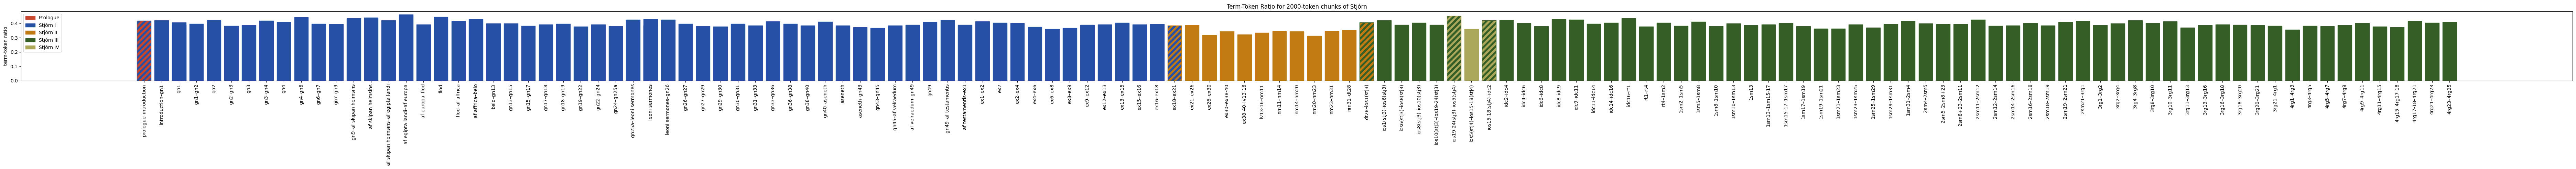

In [10]:
fig, ax = plt.subplots(figsize=(75,5))
x = [p[0] for p in ld]
y = [p[2] for p in ld]
color = [p[1][0] for p in ld]
hatch_color =[p[1][1] for p in ld]
ax.bar(x,y, color=color, edgecolor=hatch_color, hatch="//", lw=1., zorder = 0)
ax.set_ylabel('term-token ratio')
ax.set_title('Term-Token Ratio for ' + str(chunk_size) + '-token chunks of Stjórn')
plt.xticks(rotation='vertical')
rcParams['hatch.linewidth'] = 4
legend_data = [
    mpatches.Patch(color='#C7472E', label='Prologue'), 
    mpatches.Patch(color='#264FA6', label='Stjórn I'), 
    mpatches.Patch(color='#C27A13', label='Stjórn II'), 
    mpatches.Patch(color='#355E26', label='Stjórn III'), 
    mpatches.Patch(color='#ABA75B', label='Stjórn IV')
    ]
plt.legend(handles=legend_data, loc='upper left')
plt.tight_layout()
plt.savefig(fname='ttf.svg', format='svg')
plt.show()
